# Telecom Churn Prediction Case Study

### Problem Statement
    
    To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.This case study only considers usage based churn.
    
    In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.Retaining high profitable customers is the main business goal here.
    
    The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.Since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

  



In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

##### Importing and reading data for inspection and cleaning

In [4]:
# Reading data from csv file using pandas
data_df = pd.read_csv("telecom_churn_data.csv")
data_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [5]:
# Listing date columns and numeric columns
all_columns=data_df.columns
date_columns=[x for x in all_columns if 'date' in x]
numeric_columns=[x for x in all_columns if x not in date_columns]

In [6]:
print(len(numeric_columns))

214


##### Inspect Null values

Nulls in each column

In [7]:
# Code for column-wise null count 
data_df.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [9]:
# Code for column-wise null count in % 
100 * data_df.isnull().sum()/ len(data_df)

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [10]:
# Code to convert null values to 0 for all numeric columns
data_df[numeric_columns]=data_df[numeric_columns].fillna(0)

In [11]:
from datetime import date,datetime
data_df['last_date_of_month_7']=data_df['last_date_of_month_7'].fillna('7/31/2014')
data_df['last_date_of_month_8']=data_df['last_date_of_month_8'].fillna('8/31/2014')
data_df['last_date_of_month_9']=data_df['last_date_of_month_9'].fillna('9/30/2014')

In [12]:
# Code to convert null values to 0 for all date columns
data_df[date_columns]=data_df[date_columns].fillna(datetime.strptime(str(date.max), '%Y-%m-%d').strftime('%m/%d/%Y'))

In [13]:
# Code for date column's column-wise null %
round(100*(data_df[date_columns].isnull().sum()/len(data_df[date_columns].index)), 2)

last_date_of_month_6        0.0
last_date_of_month_7        0.0
last_date_of_month_8        0.0
last_date_of_month_9        0.0
date_of_last_rech_6         0.0
date_of_last_rech_7         0.0
date_of_last_rech_8         0.0
date_of_last_rech_9         0.0
date_of_last_rech_data_6    0.0
date_of_last_rech_data_7    0.0
date_of_last_rech_data_8    0.0
date_of_last_rech_data_9    0.0
dtype: float64

In [14]:
data_df[date_columns].head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
0            9/30/2014           6/21/2014           7/16/2014   
1            9/30/2014           6/29/2014           7/31/2014   
2            9/30/2014           6/17/2014           7/24/2014   
3            9/30/2014           6/28/2014           7/31/2014   
4            9/30/2014           6/26/2014           7/28/2014   

  date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
0            8/8/2014           9/28/2014                6/21/2014   
1           8/28/2014           9/30/2014               12/31/9999   
2           8/14/2014           9/29/2014               12/31/9999   
3           8/31/2014           9/30/2014               12/31/9999   
4            8/9/2014           9/28/2014                 6/4/2014   

  date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  
0                7/16/2014                 8/8/2014               12/31/9999  
1                7/25/2014                8/10/2014               12/31/9999  
2               12/31/9999               12/31/9999                9/17/2014  
3               12/31/9999               12/31/9999               12/31/9999  
4               12/31/9999               12/31/9999               12/31/9999

### Deriving new features

In [15]:
# Code for deriving new features
data_df['total_service_packs_6'] = data_df['night_pck_user_6']+data_df['monthly_2g_6']+data_df['sachet_2g_6']+data_df['monthly_3g_6']+data_df['sachet_3g_6']+data_df['fb_user_6']
data_df['total_service_packs_7'] = data_df['night_pck_user_7']+data_df['monthly_2g_7']+data_df['sachet_2g_7']+data_df['monthly_3g_7']+data_df['sachet_3g_7']+data_df['fb_user_7']
data_df['total_service_packs_8'] = data_df['night_pck_user_8']+data_df['monthly_2g_8']+data_df['sachet_2g_8']+data_df['monthly_3g_8']+data_df['sachet_3g_8']+data_df['fb_user_8']
data_df['total_service_packs_9'] = data_df['night_pck_user_9']+data_df['monthly_2g_9']+data_df['sachet_2g_9']+data_df['monthly_3g_9']+data_df['sachet_3g_9']+data_df['fb_user_9']
data_df['diff_ic_og_6'] = data_df['total_ic_mou_6']-data_df['total_og_mou_6']
data_df['diff_ic_og_7'] = data_df['total_ic_mou_7']-data_df['total_og_mou_7']
data_df['diff_ic_og_8'] = data_df['total_ic_mou_8']-data_df['total_og_mou_8']
data_df['diff_ic_og_9'] = data_df['total_ic_mou_9']-data_df['total_og_mou_9']
data_df['diff_vol_3g_2g_6'] = data_df['vol_3g_mb_6']-data_df['vol_2g_mb_6']
data_df['diff_vol_3g_2g_7'] = data_df['vol_3g_mb_7']-data_df['vol_2g_mb_7']
data_df['diff_vol_3g_2g_8'] = data_df['vol_3g_mb_8']-data_df['vol_2g_mb_8']
data_df['diff_vol_3g_2g_9'] = data_df['vol_3g_mb_9']-data_df['vol_2g_mb_9']
data_df['diff_total_service_packs_good_active_phase']=data_df['total_service_packs_6']+data_df['total_service_packs_7']-data_df['total_service_packs_8']
data_df['diff_ic_good_active_phase']=data_df['total_ic_mou_6']+data_df['total_ic_mou_7']-data_df['total_ic_mou_8']
data_df['diff_og_good_active_phase']=data_df['total_og_mou_6']+data_df['total_og_mou_7']-data_df['total_og_mou_8']
data_df['diff_2g_good_active_phase']=data_df['vol_2g_mb_6']+data_df['vol_2g_mb_7']-data_df['vol_2g_mb_8']
data_df['diff_3g_good_active_phase']=data_df['vol_3g_mb_6']+data_df['vol_3g_mb_7']-data_df['vol_3g_mb_8']
data_df['diff_total_rech_amt_good_active']= data_df['total_rech_amt_6']+data_df['total_rech_amt_7']-data_df['total_rech_amt_8']

### Filtering High value customers

In [16]:

# Filtering the high value customers
data_df['total_rech_data_amt_good_phase'] = data_df['total_rech_data_6']*data_df['av_rech_amt_data_6']+ data_df['total_rech_data_7']*data_df['av_rech_amt_data_7']
data_df['total_rech_amt_good_phase'] = data_df['total_rech_amt_6']+data_df['total_rech_amt_7']
data_df['total_amt_good_phase'] = (data_df['total_rech_data_amt_good_phase']+data_df['total_rech_amt_good_phase'])/2
data_df['total_amt_good_phase'].describe(percentiles=[.25,.5,.70,.90,.95,.99])

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
25%        128.000000
50%        275.000000
70%        478.000000
90%       1028.000000
95%       1512.000000
99%       3363.510000
max      61236.000000
Name: total_amt_good_phase, dtype: float64

In [17]:
data_df_hvc=data_df[data_df['total_amt_good_phase']>=478.00]

In [18]:
data_df_hvc.shape

(30001, 247)

### Churn tagging

In [19]:
data_df_hvc['churn']=data_df_hvc['total_ic_mou_9']+data_df_hvc['total_og_mou_9']+data_df_hvc['vol_2g_mb_9']+data_df_hvc['vol_3g_mb_9']
data_df_hvc['churn']=data_df_hvc['churn'].apply(lambda x: 1 if x==0 else 0)

In [20]:
data_df_hvc.churn.value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [21]:
columns_without_churn_details=[x for x in data_df_hvc.columns if '_9' not in x and 'sep' not in x]


In [22]:
columns_without_churn_details

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_o

In [23]:
data_df_hvc = data_df_hvc[columns_without_churn_details]

In [24]:
data_df_hvc.shape

(30001, 190)

#### Checking for duplicates

In [25]:
print(any(data_df_hvc['mobile_number'].duplicated())) 

False


#### Checking outliers

In [26]:
# Checking for outliers in the continuous variables
num_df = data_df_hvc[[x for x in data_df_hvc.columns if x not in date_columns]]

In [27]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_df.describe(percentiles=[0.02,.25,.5,.75,.90,.95,.99])

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   3.000100e+04    30001.0         30001.0         30001.0   
mean    7.001206e+09      109.0             0.0             0.0   
std     6.908784e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
2%      7.000049e+09      109.0             0.0             0.0   
25%     7.000609e+09      109.0             0.0             0.0   
50%     7.001203e+09      109.0             0.0             0.0   
75%     7.001804e+09      109.0             0.0             0.0   
90%     7.002165e+09      109.0             0.0             0.0   
95%     7.002285e+09      109.0             0.0             0.0   
99%     7.002386e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         30001.0  30001.000000  30001.000000  30001.000000  30001.000000   
mean              0.0    558.490824    560.782203    508.597957    260.793024   
std               0.0    460.640461    479.776947    501.961981    459.644368   
min               0.0  -2258.709000  -2014.045000   -945.808000      0.000000   
2%                0.0     39.839000     43.957000      0.000000      0.000000   
25%               0.0    309.865000    309.826000    231.473000     17.080000   
50%               0.0    481.694000    480.943000    427.585000     84.580000   
75%               0.0    699.943000    698.315000    661.491000    290.440000   
90%               0.0    994.099000    995.859000    977.345000    754.160000   
95%               0.0   1240.964000   1261.272000   1255.019000   1135.440000   
99%               0.0   1985.115000   1999.500000   1986.622000   2151.740000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     267.819295    234.112539    373.693961    378.103169    335.077044   
std      479.993989    458.448598    482.523558    498.923555    482.062509   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
2%         0.000000      0.000000      0.000000      0.000000      0.000000   
25%       16.030000     10.390000     71.610000     69.910000     46.740000   
50%       82.810000     65.610000    222.540000    220.030000    182.790000   
75%      290.240000    239.960000    487.940000    494.010000    438.890000   
90%      784.480000    665.080000    895.830000    916.080000    823.680000   
95%     1185.790000   1074.590000   1256.610000   1272.290000   1167.540000   
99%     2201.960000   2159.110000   2326.360000   2410.890000   2193.130000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   30001.000000   30001.000000   30001.000000   30001.000000   
mean       16.110355      12.642504      12.500551      26.571547   
std        76.302156      75.785903      74.125281     116.205525   
min         0.000000       0.000000       0.000000       0.000000   
2%          0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        27.390000      14.290000      15.010000      50.430000   
95%        84.540000      55.640000      56.350000     145.410000   
99%       342.440000     280.460000     282.190000     530.710000   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   30001.000000   30001.000000      30001.000000      30001.000000   
mean 

### We can see outliers in our data. We will treat these outliers now.

In [28]:
filt_df = data_df_hvc[[x for x in data_df_hvc.columns if x not in date_columns]]
low = .001
high = .999
quant_df = filt_df.quantile([low, high])
quant_df

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0.001   7.000002e+09      109.0             0.0             0.0   
0.999   7.002408e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0.001             0.0    -3.000    -7.420    -5.000         0.00         0.00   
0.999             0.0  3884.712  4115.703  3976.261      4136.34      4355.98   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0.001         0.00          0.00          0.00          0.00           0.00   
0.999      4165.71       4175.83       4546.48       4472.46         920.59   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
0.001           0.00           0.00           0.00           0.00   
0.999        1022.38         917.96        1458.89        1244.64   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0.001           0.00              0.00              0.00              0.00   
0.999        1365.11           3006.24           3098.94           2767.29   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
0.001              0.00              0.00              0.00              0.00   
0.999           2401.48           2192.58           2099.48            257.18   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
0.001              0.00              0.00              0.00              0.00   
0.999            242.26            234.68             72.29             90.53   

       loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
0.001              0.00          0.00          0.00          0.00   
0.999             75.43       3508.19       3604.84       3353.39   

       std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
0.001              0.00              0.00              0.00              0.00   
0.999           3708.53           3877.74           3779.73           3884.23   

       std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
0.001              0.00              0.00              0.00              0.00   
0.999           4267.94           4240.41            180.08            183.98   

       std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  \
0.001              0.00               0.0               0.0               0.0   
0.999            161.74               0.0               0.0               0.0   

       std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  \
0.001          0.00          0.00          0.00          0.00          0.00   
0.999       4929.71       5003.64       5269.71        301.69        302.21   

       isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  \
0.001          0.00          0.00          0.00          0.00         0.00   
0.999        358.88        208.46        253.73        273.46        23.53   

       og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  \
0.001         0.00          0.0            0.00            0.00   
0.999         6.09          6.7         5423.59         5766.44   

       total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  \
0.001            0.00              0.00              0.00              0.00   
0.999         5762.48           2182.88           2436.23           2169.71   

       loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  \
0.001              0.00              0.00              0.00              0.00   
0.999           2225.44           2356.78           2172.51            512.79   

       loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  \
0.001              0.00              0.00          0.00          0.00   
0.999            602.33            487.44       3075.49       3150.29   

       loc_ic_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  

In [29]:
filt_df = filt_df.apply(lambda x: x[(x>=quant_df.loc[low,x.name]) & 
                                    (x <= quant_df.loc[high,x.name])], axis=0)

In [30]:
# Merging with the leads dataframe
data_df_hvc = pd.concat([data_df_hvc.loc[:, ~data_df_hvc.columns.isin([x for x in data_df_hvc.columns if x not in date_columns])], filt_df], axis=1)

In [31]:
# Dropping NAN values
data_df_hvc.dropna(inplace=True)
data_df_hvc.shape

(27861, 190)

In [32]:
data_df_hvc.churn.value_counts()

0    25603
1     2258
Name: churn, dtype: int64

### Checking correlations

In [33]:
# Let's see the correlation matrix 
data_df_hvc.corr()

mobile_number  circle_id  \
mobile_number                                    1.000000        NaN   
circle_id                                             NaN        NaN   
loc_og_t2o_mou                                        NaN        NaN   
std_og_t2o_mou                                        NaN        NaN   
loc_ic_t2o_mou                                        NaN        NaN   
arpu_6                                           0.040582        NaN   
arpu_7                                           0.042131        NaN   
arpu_8                                           0.051268        NaN   
onnet_mou_6                                      0.008680        NaN   
onnet_mou_7                                      0.005527        NaN   
onnet_mou_8                                      0.008375        NaN   
offnet_mou_6                                     0.023314        NaN   
offnet_mou_7                                     0.013612        NaN   
offnet_mou_8                                     0.022316        NaN   
roam_ic_mou_6                                    0.009095        NaN   
roam_ic_mou_7                                    0.003852        NaN   
roam_ic_mou_8                                    0.009626        NaN   
roam_og_mou_6                                    0.009181        NaN   
roam_og_mou_7                                    0.005140        NaN   
roam_og_mou_8                                    0.002256        NaN   
loc_og_t2t_mou_6                                 0.056315        NaN   
loc_og_t2t_mou_7                                 0.053847        NaN   
loc_og_t2t_mou_8                                 0.056163        NaN   
loc_og_t2m_mou_6                                 0.091990        NaN   
loc_og_t2m_mou_7                                 0.088011        NaN   
loc_og_t2m_mou_8                                 0.090425        NaN   
loc_og_t2f_mou_6                                 0.074701        NaN   
loc_og_t2f_mou_7                                 0.074100        NaN   
loc_og_t2f_mou_8                                 0.073670        NaN   
loc_og_t2c_mou_6                                -0.005055        NaN   
loc_og_t2c_mou_7                                -0.009558        NaN   
loc_og_t2c_mou_8                                 0.000979        NaN   
loc_og_mou_6                                     0.098194        NaN   
loc_og_mou_7                                     0.094071        NaN   
loc_og_mou_8                                     0.096021        NaN   
std_og_t2t_mou_6                                -0.019218        NaN   
std_og_t2t_mou_7                                -0.020933        NaN   
std_og_t2t_mou_8                                -0.017158        NaN   
std_og_t2m_mou_6                                -0.032855        NaN   
std_og_t2m_mou_7                                -0.037804        NaN   
std_og_t2m_mou_8                                -0.032901        NaN   
std_og_t2f_mou_6                                 0.031990        NaN   
std_og_t2f_mou_7                                 0.028310        NaN   
std_og_t2f_mou_8                                 0.033439        NaN   
std_og_t2c_mou_6                                      NaN        NaN   
std_og_t2c_mou_7                                      NaN        NaN   
std_og_t2c_mou_8                                      NaN        NaN   
std_og_mou_6                                    -0.034367        NaN   
std_og_mou_7                                    -0.038873        NaN   
std_og_mou_8                                    -0.032375        NaN   
isd_og_mou_6                                    -0.006340        NaN   
isd_og_mou_7                                    -0.003597        NaN   
isd_og_mou_8                                    -0.003930        NaN   
spl_og_mou_6                                    -0.025168        NaN   
spl_og_mou_7                                    -0.022232        NaN   
spl_og_mou_8

In [34]:
# Removing variables which do not capture any variance
data_df_hvc=data_df_hvc.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],1)

In [35]:
# Converting datetime to categories
data_df_hvc['date_of_last_rech_6'] = data_df_hvc['date_of_last_rech_6'].astype('category')
data_df_hvc['date_of_last_rech_7'] = data_df_hvc['date_of_last_rech_7'].astype('category')
data_df_hvc['date_of_last_rech_8'] = data_df_hvc['date_of_last_rech_8'].astype('category')
data_df_hvc['date_of_last_rech_data_6'] = data_df_hvc['date_of_last_rech_data_6'].astype('category')
data_df_hvc['date_of_last_rech_data_7'] = data_df_hvc['date_of_last_rech_data_7'].astype('category')
data_df_hvc['date_of_last_rech_data_8'] = data_df_hvc['date_of_last_rech_data_8'].astype('category')
cat_columns = data_df_hvc.select_dtypes(['category']).columns
data_df_hvc[cat_columns] = data_df_hvc[cat_columns].apply(lambda x: x.cat.codes)

#### EDA 

In [37]:
import seaborn as sns
# Creating churn dataframe
data_churn = data_df_hvc[data_df_hvc['churn'] == 1]
# Creating not churn dataframe
data_non_churn = data_df_hvc[data_df_hvc['churn'] == 0]

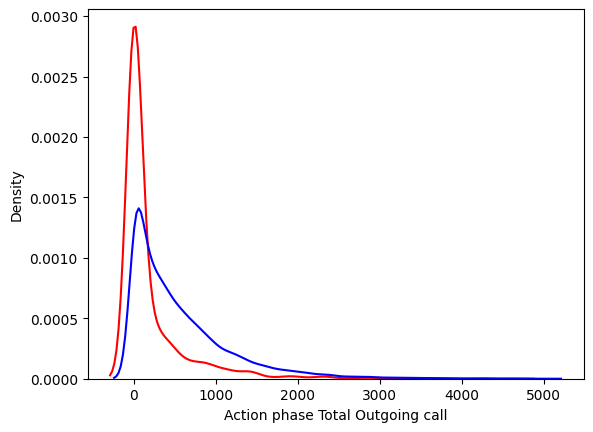

In [39]:

ax = sns.distplot(data_churn['total_og_mou_8'],label='churn',hist=False,color='red')
ax = sns.distplot(data_non_churn['total_og_mou_8'],label='not churn',hist=False,color='blue')
ax.set(xlabel='Action phase Total Outgoing call')
plt.show()

##### Analysis
    The customers who have more minutes of outgoing call are less likely to be churned

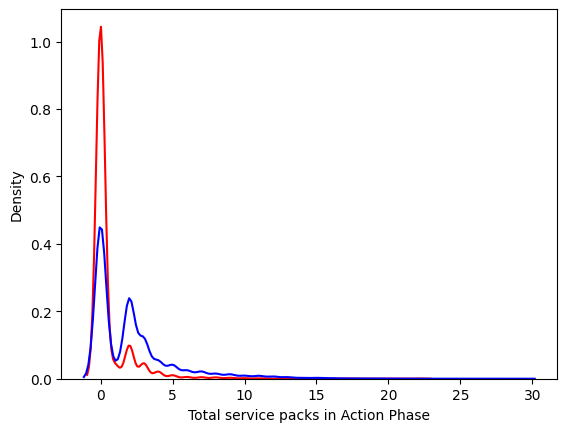

In [43]:
ax = sns.distplot(data_churn['total_service_packs_8'],label='churn',hist=False,color='red')
ax = sns.distplot(data_non_churn['total_service_packs_8'],label='not churn',hist=False,color='blue')
ax.set(xlabel='Total service packs in Action Phase')
plt.show()

##### Analysis
    Customers likely to be churned have bought less service packs.

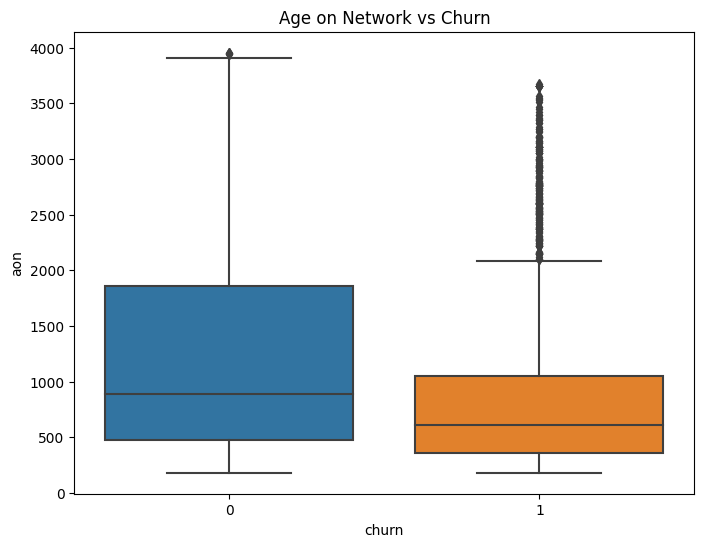

In [45]:
plt.figure(figsize=(8,6))
sns.boxplot(y='aon', x='churn', data=data_df_hvc)
plt.title('Age on Network vs Churn')
plt.show()

##### Analysis
The customers with lesser 'aon' are more likely to Churn when compared to the Customers with higer 'aon'

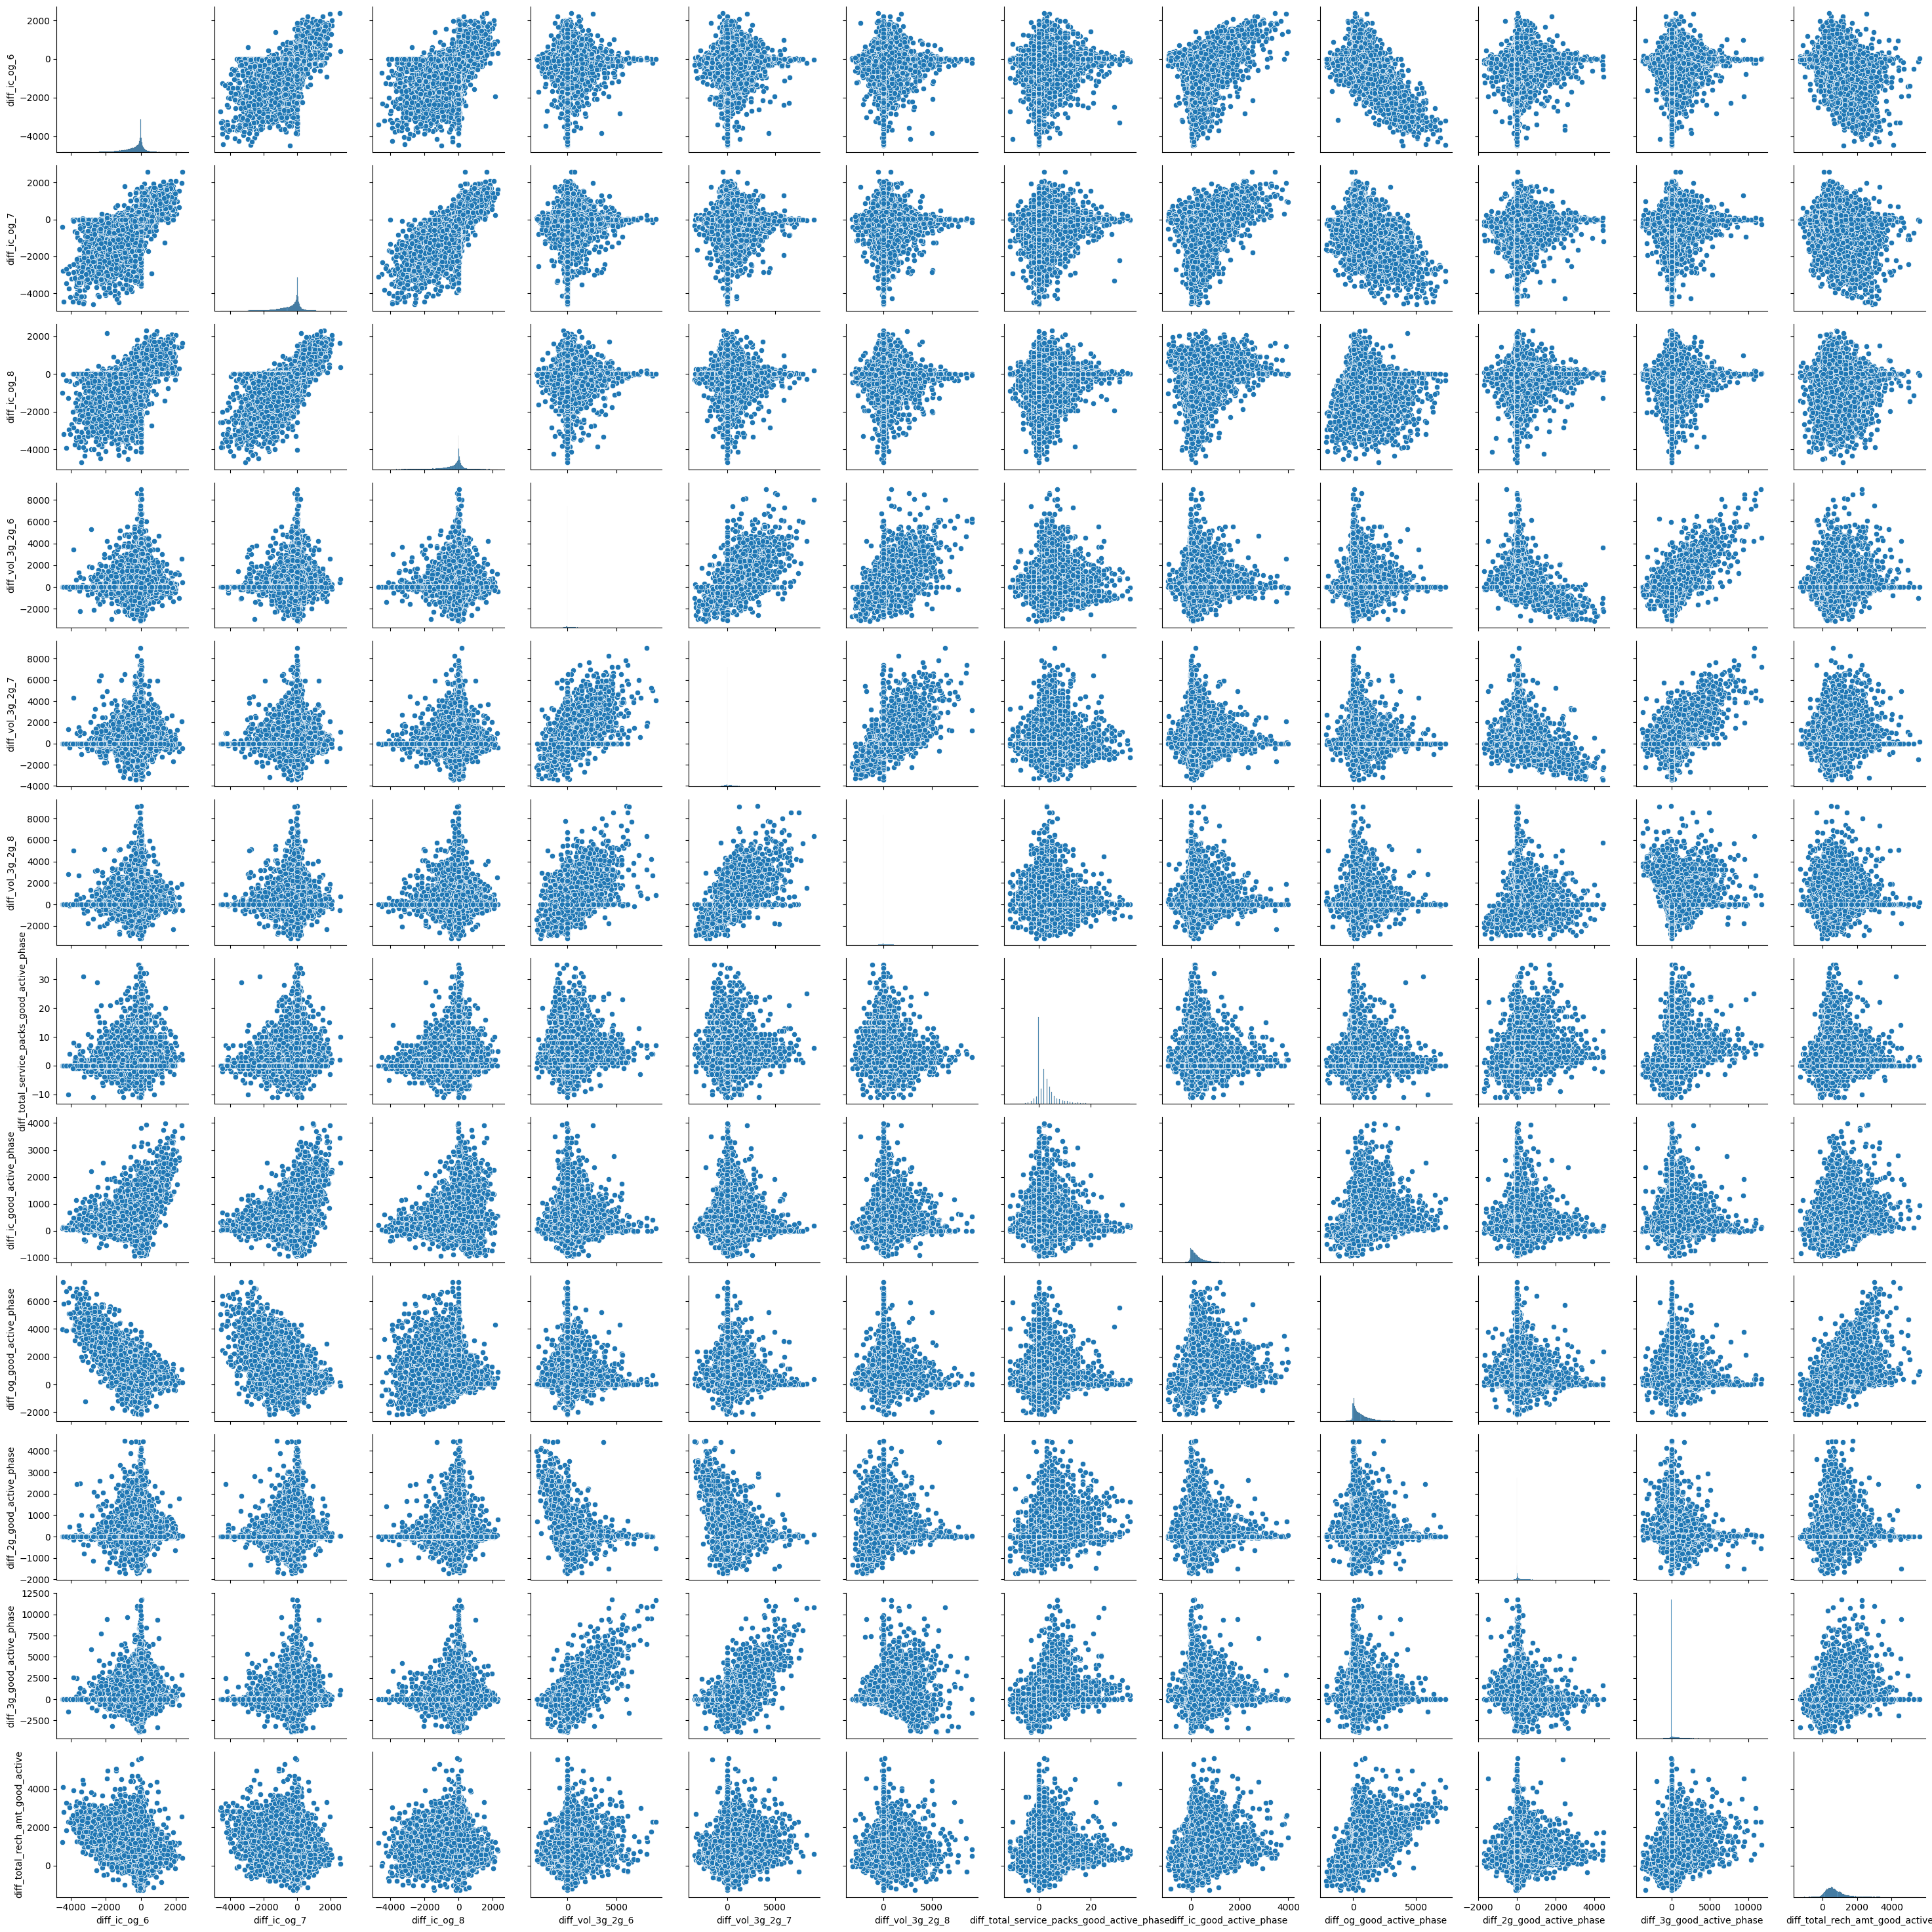

In [46]:
#Analysis on derived variables

sns.pairplot(data_df_hvc[[x for x in data_df_hvc.columns if 'diff' in x]])
plt.show()

### Handling Class Imbalance using SMOTE

Text(0.5, 1.0, 'churned')

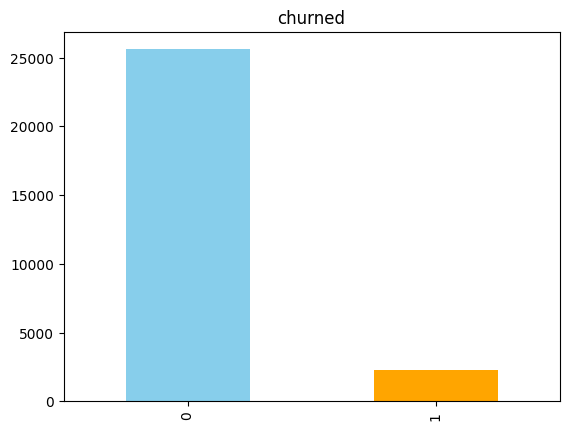

In [47]:
data_df_hvc['churn'].value_counts().plot(kind='bar', color=['skyblue', 'orange']).set_title('churned')

In [48]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# Separate input features and target
y = data_df_hvc.churn
X = data_df_hvc.drop('churn', axis=1)
# scaling the features
X_scaled = scale(X)
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.7, test_size=0.3, random_state=100)

sm = SMOTE(random_state=100, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'churned')

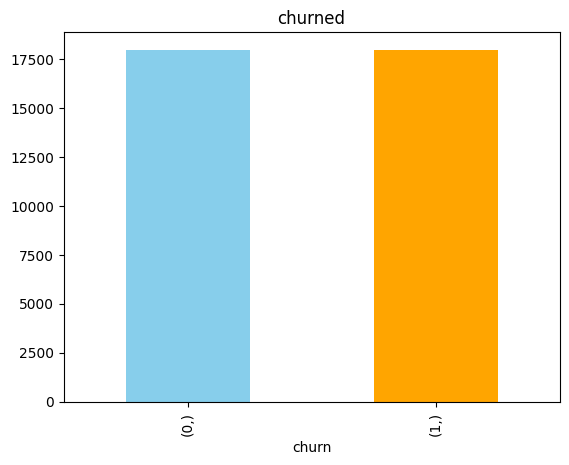

In [49]:
pd.DataFrame(y_train).value_counts().plot(kind='bar', color=['skyblue', 'orange']).set_title('churned')

In [50]:
X_train.shape

(35936, 182)

### Performing PCA for feature reduction

In [51]:
# Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [52]:
# Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [53]:
pca.components_

array([[-5.68742944e-02, -4.68017313e-02, -1.80483989e-02, ...,
         1.18766750e-01, -1.15185977e-01,  6.51577065e-02],
       [-2.59307193e-03,  4.60930282e-02,  5.69476437e-02, ...,
         1.87860287e-02,  1.57345131e-01,  8.32100182e-02],
       [ 6.83852104e-04, -1.18015765e-02,  4.81331241e-04, ...,
         7.19608233e-02,  6.59920207e-02,  9.58633666e-02],
       ...,
       [-0.00000000e+00, -7.05183672e-17,  2.59025587e-17, ...,
        -1.47619822e-11,  4.82081056e-11,  1.55167499e-11],
       [ 0.00000000e+00,  3.36925585e-17, -5.28905351e-18, ...,
        -2.01823156e-11,  1.33286851e-11,  2.12141692e-11],
       [ 0.00000000e+00,  5.72989530e-17, -8.04211529e-17, ...,
         1.16394434e-11,  2.47079211e-11, -1.22343920e-11]])

#### Looking at the screeplot to assess the number of needed principal components

In [54]:
pca.explained_variance_ratio_

array([1.41664373e-01, 9.11593994e-02, 6.11852926e-02, 5.88951283e-02,
       4.14217473e-02, 3.51036937e-02, 2.98802120e-02, 2.90093944e-02,
       2.33297202e-02, 2.23286393e-02, 1.93679622e-02, 1.92862996e-02,
       1.56463107e-02, 1.44283841e-02, 1.40528464e-02, 1.31754021e-02,
       1.26793443e-02, 1.25142060e-02, 1.11476529e-02, 1.10081753e-02,
       1.06999920e-02, 1.00398477e-02, 9.88719774e-03, 9.08373239e-03,
       8.78323086e-03, 8.54892014e-03, 8.45365736e-03, 7.92438968e-03,
       7.27023583e-03, 7.09983278e-03, 6.98370461e-03, 6.58134121e-03,
       6.32741022e-03, 6.26444845e-03, 6.11746906e-03, 5.93001328e-03,
       5.62315590e-03, 5.52412899e-03, 5.48325745e-03, 5.38368344e-03,
       5.23960516e-03, 5.15982188e-03, 4.96171749e-03, 4.88851113e-03,
       4.82906765e-03, 4.69619158e-03, 4.40589578e-03, 4.36540184e-03,
       4.29971723e-03, 4.12570091e-03, 4.03654898e-03, 3.89644248e-03,
       3.85570764e-03, 3.68823848e-03, 3.56991735e-03, 3.56553500e-03,
      

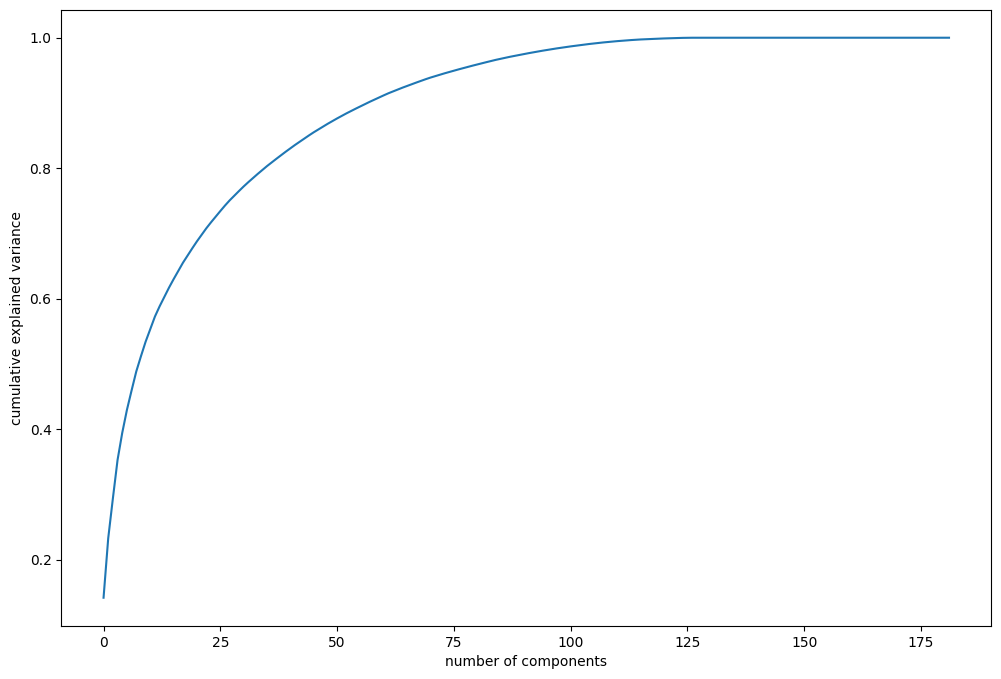

In [55]:
# Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

 We came to know that using 55 components we can see more than 90% of variance is explained.

In [56]:
# Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=55)

In [57]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(35936, 55)

In [58]:
# Creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

In [59]:
corrmat

array([[ 1.00000000e+00, -2.50140918e-06, -1.41723527e-05, ...,
         8.87319559e-05,  3.09104514e-05, -3.70041361e-05],
       [-2.50140918e-06,  1.00000000e+00,  8.33393673e-06, ...,
        -1.05329064e-04, -1.40617801e-05, -7.17528079e-05],
       [-1.41723527e-05,  8.33393673e-06,  1.00000000e+00, ...,
        -1.13038059e-04,  1.56795875e-04,  1.55877434e-05],
       ...,
       [ 8.87319559e-05, -1.05329064e-04, -1.13038059e-04, ...,
         1.00000000e+00,  4.79969783e-03,  4.00649310e-03],
       [ 3.09104514e-05, -1.40617801e-05,  1.56795875e-04, ...,
         4.79969783e-03,  1.00000000e+00, -1.80614304e-03],
       [-3.70041361e-05, -7.17528079e-05,  1.55877434e-05, ...,
         4.00649310e-03, -1.80614304e-03,  1.00000000e+00]])

In [60]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.027529575392312437 , min corr:  -0.01583993701966756


In [61]:
# Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8359, 55)

#### Applying a logistic regression on our Principal Components

In [62]:
# Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [63]:
y_train_pred = model_pca.predict_proba(df_train_pca)[:,1]
y_train_pred

array([0.01480913, 0.66288067, 0.00602846, ..., 0.99180658, 0.86644992,
       0.89702317])

In [64]:
y_train_pred_final = pd.DataFrame({'Churn':y_train, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

Churn  Churn_Prob
0      0    0.014809
1      0    0.662881
2      0    0.006028
3      0    0.013832
4      0    0.001867

In [65]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.014809    1    0    0    0    0    0    0    0    0    0
1      0    0.662881    1    1    1    1    1    1    1    0    0    0
2      0    0.006028    1    0    0    0    0    0    0    0    0    0
3      0    0.013832    1    0    0    0    0    0    0    0    0    0
4      0    0.001867    1    0    0    0    0    0    0    0    0    0

In [66]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.728629  0.980076  0.477182
0.2   0.2  0.789348  0.961098  0.617598
0.3   0.3  0.820152  0.930321  0.709984
0.4   0.4  0.838018  0.898152  0.777883
0.5   0.5  0.846839  0.859918  0.833760
0.6   0.6  0.847340  0.813390  0.881289
0.7   0.7  0.837433  0.757569  0.917297
0.8   0.8  0.797195  0.646204  0.948186
0.9   0.9  0.683354  0.389081  0.977627


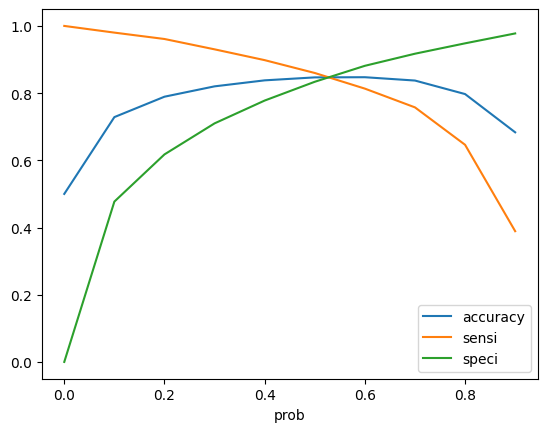

In [67]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.53 is the optimum point to take it as a cutoff probability.

In [68]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.53 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  \
0      0    0.014809    1    0    0    0    0    0    0    0    0    0   
1      0    0.662881    1    1    1    1    1    1    1    0    0    0   
2      0    0.006028    1    0    0    0    0    0    0    0    0    0   
3      0    0.013832    1    0    0    0    0    0    0    0    0    0   
4      0    0.001867    1    0    0    0    0    0    0    0    0    0   

   final_predicted  
0                0  
1                1  
2                0  
3                0  
4                0

In [119]:
confusion = metrics.confusion_matrix( y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion

array([[15276,  2692],
       [ 2765, 15203]], dtype=int64)

In [120]:
# Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
y_test_df=pd.DataFrame(y_test)
y_pred_df=pd.DataFrame(pred_probs_test)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_df.reset_index(drop=True, inplace=True)
y_test_pred_final=pd.concat([y_test_df, y_pred_df],axis=1)

In [121]:
# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Churn_prob'})

In [122]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_prob.map(lambda x: 1 if x > 0.53 else 0)

In [123]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.churn, y_test_pred_final.final_predicted )

In [124]:
confusion2

array([[6377, 1258],
       [ 137,  587]], dtype=int64)

In [125]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [126]:
#Accuracy
(TP+TN)/float(TP+TN+FP+FN)

0.8331140088527336

In [127]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8107734806629834

In [128]:
# Positive predictive value 
print (TP / float(TP+FP))

0.3181571815718157


In [129]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9789683758059564


In [79]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, pred_probs_test, drop_intermediate = False )

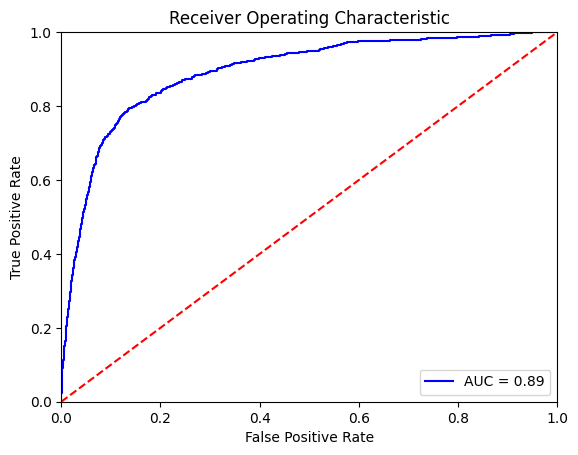

In [80]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Using Random Forest Model

In [81]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

rfc.fit(df_train_pca,y_train)

RandomForestClassifier()

In [82]:
# Making predictions
predictions = rfc.predict(df_test_pca)

In [83]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [84]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      7635
           1       0.47      0.51      0.49       724

    accuracy                           0.91      8359
   macro avg       0.71      0.73      0.72      8359
weighted avg       0.91      0.91      0.91      8359



In [85]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [3, 6]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring= 'roc_auc', 
                          cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [3, 6],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [86]:
# Printing the optimal accuracy score and hyperparameters
print('We can get best score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get best score of 0.9365388937666107 using {'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [87]:
# Model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=6,
                             n_estimators=200)

In [88]:
# Fit
rfc.fit(df_train_pca,y_train)
# Predict
predictions = rfc.predict(df_test_pca)

In [89]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      7635
           1       0.37      0.75      0.49       724

    accuracy                           0.87      8359
   macro avg       0.67      0.81      0.71      8359
weighted avg       0.92      0.87      0.89      8359



In [90]:
# Metrics
print(metrics.confusion_matrix(y_test, predictions), "\n")
print("accuracy", metrics.accuracy_score(y_test, predictions))
print("precision", metrics.precision_score(y_test, predictions))
print("sensitivity/recall", metrics.recall_score(y_test, predictions))
print("roc_auc_score", metrics.roc_auc_score(y_test, predictions))

[[6697  938]
 [ 182  542]] 

accuracy 0.8660126809426965
precision 0.3662162162162162
sensitivity/recall 0.7486187845303868
roc_auc_score 0.8128817563778326


### Based on the above models the best model is first one i.e Logistic regression model which gives recall of 81% and ROC value of .89

#### Model Building for identifying important predictor attributes which help the business understand indicators of churn

In [91]:
y = data_df_hvc.churn
X = data_df_hvc.drop('churn', axis=1)

# Scaling the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled_df=pd.DataFrame(X_scaled,columns=X.columns)

# Setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, train_size=0.7, test_size=0.3, random_state=100)

In [92]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# Running RFE with 60 variables as output
rfe = RFE(logreg, n_features_to_select=60)             
rfe = rfe.fit(X_train, y_train)

In [93]:
rfe.support_

array([False, False,  True, False,  True,  True, False,  True, False,
       False, False, False, False,  True,  True,  True, False,  True,
        True, False, False,  True, False, False,  True,  True,  True,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False,  True, False, False,  True, False, False,
        True,  True, False,  True, False,  True,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True,  True, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,

In [94]:
X_scaled_df.head()

date_of_last_rech_6  date_of_last_rech_7  date_of_last_rech_8  \
0            -1.198162            -2.562876             1.754628   
1             0.035140            -0.549843            -0.216251   
2            -0.375961             0.859280             0.679603   
3             0.857342             0.859280             0.858774   
4            -2.020364             1.664493            -0.574593   

   date_of_last_rech_data_6  date_of_last_rech_data_7  \
0                  0.463638                 -0.189903   
1                 -0.937936                 -0.954926   
2                 -0.937936                  1.435770   
3                 -0.937936                 -0.954926   
4                 -0.937936                  1.818282   

   date_of_last_rech_data_8  mobile_number    arpu_6    arpu_7    arpu_8  \
0                  2.001931      -0.530951 -0.986211 -0.947754 -0.737110   
1                 -0.879224      -0.735825  1.572421  2.449825  7.518538   
2                  0.657392       0.459064 -0.454008 -0.117371 -0.950477   
3                 -0.879224       1.329010 -0.055648  0.198519  0.446264   
4                  1.809854      -0.466061 -1.347306 -1.010372 -0.309592   

   onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0    -0.609384    -0.606968    -0.563349     -0.828077     -0.819595   
1    -0.468861    -0.477197    -0.430188      0.218824      0.469232   
2     0.395681     0.226125    -0.474015     -0.609521     -0.636370   
3    -0.360578    -0.293434    -0.346532      0.921869      1.218040   
4    -0.490435    -0.486737    -0.477834     -0.630878     -0.616531   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0     -0.770760      -0.241451      -0.202663      -0.210263      -0.254642   
1      0.019184       0.040128       0.467126       0.440994       0.003771   
2     -0.439958      -0.241451      -0.202663      -0.210263      -0.254642   
3      1.612789      -0.241451      -0.202663      -0.210263      -0.254642   
4     -0.271722      -0.241451      -0.202663      -0.210263      -0.254642   

   roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0      -0.227345      -0.222149         -0.429072         -0.425631   
1      -0.060332       0.278790         -0.150961         -0.258081   
2      -0.227345      -0.222149          1.178928          0.736170   
3      -0.227345      -0.222149         -0.404827         -0.392741   
4      -0.227345      -0.222149         -0.164112         -0.155137   

   loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0         -0.432512         -0.701893         -0.722886         -0.693119   
1         -0.191459          0.663504          1.312856          0.067041   
2         -0.357766         -0.343721         -0.401721         -0.456377   
3         -0.292835         -0.295720         -0.322772         -0.202163   
4         -0.231555         -0.334961         -0.345160          0.002773   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
0         -0.364172         -0.368903         -0.363603         -0.298331   
1          3.580252          3.129895          3.244954         -0.298331   
2         -0.364172         -0.368903         -0.363603         -0.298331   
3         -0.316557         -0.368903         -0.256492         -0.298331   
4         -0.364172         -0.368903         -0.363603         -0.298331   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
0         -0.300346         -0.299839     -0.739064     -0.751475   
1         -0.300346         -0.299839      0.541301      0.890174   
2         -0.300346          1.125034      0.407642      0.134612   
3         -0.300346         -0.299839     -0.444752     -0.462170   
4         -0.300346          3.229462     -0.338995     -0.340440   

   loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
0     -0.727541         -0.434366         -0.

In [95]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('date_of_last_rech_6', False, 103),
 ('date_of_last_rech_7', False, 77),
 ('date_of_last_rech_8', True, 1),
 ('date_of_last_rech_data_6', False, 60),
 ('date_of_last_rech_data_7', True, 1),
 ('date_of_last_rech_data_8', True, 1),
 ('mobile_number', False, 113),
 ('arpu_6', True, 1),
 ('arpu_7', False, 51),
 ('arpu_8', False, 13),
 ('onnet_mou_6', False, 40),
 ('onnet_mou_7', False, 32),
 ('onnet_mou_8', False, 9),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 109),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', True, 1),
 ('roam_og_mou_6', False, 42),
 ('roam_og_mou_7', False, 33),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 39),
 ('loc_og_t2t_mou_7', False, 21),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2m_mou_8', False, 89),
 ('loc_og_t2f_mou_6', True, 1),
 ('loc_og_t2f_mou_7', False, 50),
 ('loc_og_t2f_mou_8', False, 49),
 ('loc_og_t2c_mou

In [96]:
col = X_train.columns[rfe.support_]

In [97]:
X_train.columns[~rfe.support_]

Index(['date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_data_6', 'mobile_number', 'arpu_7', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'roam_ic_mou_6',
       ...
       'diff_ic_og_7', 'diff_ic_og_8', 'diff_vol_3g_2g_6', 'diff_vol_3g_2g_7',
       'diff_vol_3g_2g_8', 'diff_total_service_packs_good_active_phase',
       'diff_3g_good_active_phase', 'diff_total_rech_amt_good_active',
       'total_rech_data_amt_good_phase', 'total_rech_amt_good_phase'],
      dtype='object', length=122)

In [98]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()
rfc.fit(X_train[col],y_train)

RandomForestClassifier()

In [99]:
# Making predictions
predictions = rfc.predict(X_test[col])

In [100]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      7635
           1       0.75      0.49      0.59       724

    accuracy                           0.94      8359
   macro avg       0.85      0.74      0.78      8359
weighted avg       0.93      0.94      0.94      8359



### Hyperparameter Tuning

In [101]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,12,16],
    'min_samples_leaf': range(100, 800, 200),
    'min_samples_split': range(200, 1000, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [6,9,12]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring= 'roc_auc', 
                          cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train[col],y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [8, 12, 16], 'max_features': [6, 9, 12],
                         'min_samples_leaf': range(100, 800, 200),
                         'min_samples_split': range(200, 1000, 200),
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [102]:
# Printing the optimal accuracy score and hyperparameters
print('We can get best score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get best score of 0.9277929208592245 using {'max_depth': 16, 'max_features': 12, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [103]:
# Model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=12,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=12,
                             n_estimators=200)

In [104]:
# Fit
rfc.fit(X_train[col],y_train)
# Predict
predictions = rfc.predict(X_test[col])

In [105]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      7635
           1       0.74      0.48      0.59       724

    accuracy                           0.94      8359
   macro avg       0.85      0.73      0.78      8359
weighted avg       0.93      0.94      0.94      8359



In [106]:
# Metrics
print(metrics.confusion_matrix(y_test, predictions), "\n")
print("accuracy", metrics.accuracy_score(y_test, predictions))
print("precision", metrics.precision_score(y_test, predictions))
print("sensitivity/recall", metrics.recall_score(y_test, predictions))
print("roc_auc_score", metrics.roc_auc_score(y_test, predictions))

[[7515  120]
 [ 374  350]] 

accuracy 0.9409020217729394
precision 0.7446808510638298
sensitivity/recall 0.48342541436464087
roc_auc_score 0.7338541610133616


#### Advanced Metrics beyond simply accuracy

In [107]:
confusion=metrics.confusion_matrix(y_test, predictions)

In [108]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [109]:
# Let's see the sensitivity of our logistic regression model
Senstivity = TP / float(TP+FN)
Senstivity

0.48342541436464087

In [110]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
specificity

0.9842829076620825

In [111]:
# Calculate false postive rate - predicting conversion when customer have not converted
FPR=FP/ float(TN+FP)
FPR

0.015717092337917484

In [112]:
# positive predictive value 
PPV = TP / float(TP+FP)
PPV

0.7446808510638298

In [113]:
# Negative predictive value
NPV = TN / float(TN+ FN)
NPV

0.952592217011028

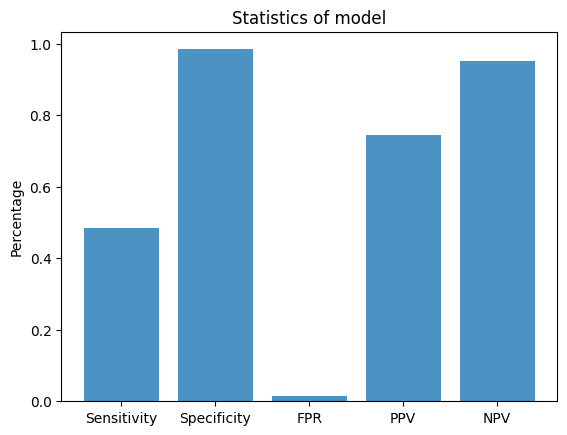

In [114]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Sensitivity', 'Specificity', 'FPR', 'PPV', 'NPV')
y_pos = np.arange(len(objects))
values = [Senstivity,specificity,FPR,PPV,NPV]

plt.bar(y_pos, values, align='center', alpha=0.8)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Statistics of model')

plt.show()

### Finding important features in original data on which our model depends

In [115]:
def plot_feature_importances(clf, X_train, y_train=None, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances"):
    
    __name__ = "plot_feature_importances"
    
    import pandas as pd
    import numpy  as np
    import matplotlib.pyplot as plt
    
    try: 
        if not hasattr(clf, 'feature_importances_'):
            clf.fit(X_train.values, y_train.values.ravel())

            if not hasattr(clf, 'feature_importances_'):
                raise AttributeError("{} does not have feature_importances_ attribute".
                                    format(clf.__class__.__name__))
                
    except ( ValueError):
        clf.fit(X_train.values, y_train.values.ravel())
            
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp

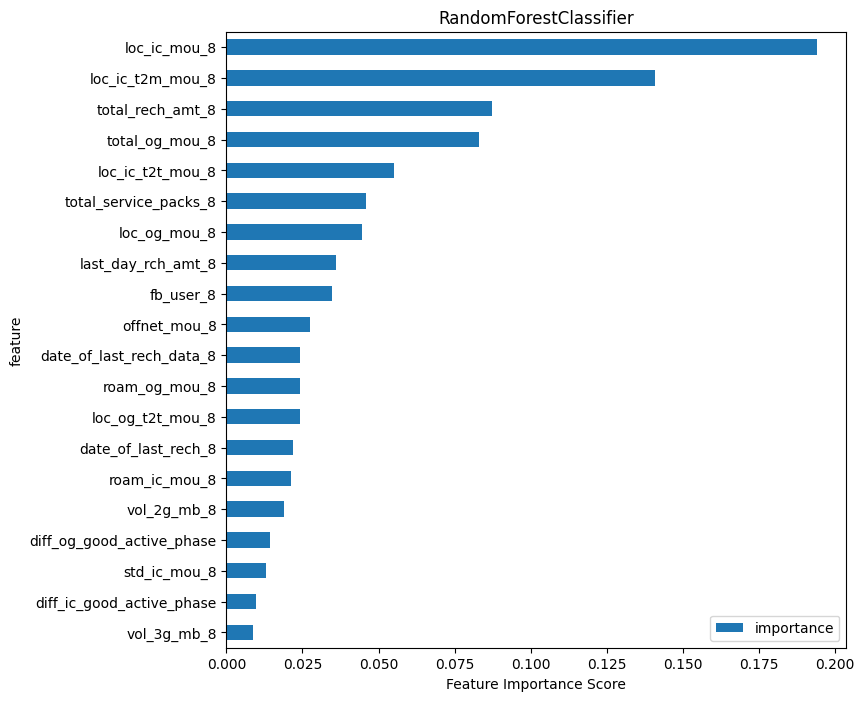

importance
feature                              
vol_3g_mb_8                  0.008738
diff_ic_good_active_phase    0.009863
std_ic_mou_8                 0.012934
diff_og_good_active_phase    0.014452
vol_2g_mb_8                  0.018815
roam_ic_mou_8                0.021117
date_of_last_rech_8          0.021749
loc_og_t2t_mou_8             0.024054
roam_og_mou_8                0.024090
date_of_last_rech_data_8     0.024222
offnet_mou_8                 0.027378
fb_user_8                    0.034569
last_day_rch_amt_8           0.036127
loc_og_mou_8                 0.044598
total_service_packs_8        0.045857
loc_ic_t2t_mou_8             0.054933
total_og_mou_8               0.083002
total_rech_amt_8             0.087278
loc_ic_t2m_mou_8             0.140718
loc_ic_mou_8                 0.194017

In [116]:
plot_feature_importances(rfc, X_train[col], y_train, top_n=20,title=rfc.__class__.__name__)

In [117]:
print(1)

1


## Final Conclusion
    
  ###### Best fit Model
    
    Based on the above models the best model is first one i.e Logistic regression model with PCA.
    Recall/Sensitivity is the main metric which is used for evaluation as False Negative has to be minimum in this case .
    This model gives recall of 81% and ROC value of .89

    Logistic Regression with PCA
    
    Accuracy 0.864098576384735
    sensitivity/recall 0.8107734806629834
    roc_auc_score 0.89
    
   ###### Model for Interpretation
       
       The Random Forest Classifier is used for the interpretation.The important features that are dependent on the churning of the customers are plotted in the above graph.
       
   ###### Steps to help reduce churn

    -Give special discounts to customers according to their usage so that minutes of usage will be increased which in turn reduce the churning probability

    -Provide additional internet services on recharge .

    -Lower tariffs on data usage,a better 2G area coverage where 3G is not available.

    -Expansion of 3G network where 3G is currently not available.
        